In [1]:
%load_ext autoreload

In [2]:
%autoreload
import pathlib
import matplotlib.pyplot as plt
import pke
import networkx as nx

In [3]:
sample_text_path = pathlib.Path('sample.txt')
assert sample_text_path.exists()
with open(sample_text_path) as f:
    print(f.read())

Compatibility of systems of linear constraints over the set of natural numbers.
Criteria of compatibility of a system of linear Diophantine equations, strict
inequations, and nonstrict inequations are considered. Upper bounds for
components of a minimal set of solutions and algorithms of construction of
minimal generating sets of solutions for all types of systems are given.
These criteria and the corresponding algorithms for constructing a minimal
supporting set of solutions can be used in solving all the considered types
systems and systems of mixed types.


In [4]:
# define the set of valid Part-of-Speeches
pos = {'NOUN', 'PROPN', 'ADJ'}

# 1. create a TextRank extractor.
extractor = pke.unsupervised.TextRank()

# 2. load the content of the document.
extractor.load_document(input=str(sample_text_path),
                        language='en',
                        normalization=None)

# 3. build the graph representation of the document and rank the words.
#    Keyphrase candidates are composed from the 33-percent
#    highest-ranked words.
extractor.candidate_weighting(window=2,
                              pos=pos,
                              top_percent=0.33)

# 4. get the 10-highest scored candidates as keyphrases
keyphrases = extractor.get_n_best(n=10)

In [6]:
keyphrases

[('linear diophantine', 0.1672965019497789),
 ('nonstrict inequations', 0.12894236937312212),
 ('natural numbers', 0.1289421693731221),
 ('linear', 0.08364818597488946),
 ('inequations', 0.06447130468656105),
 ('set', 0.06447111468656105)]

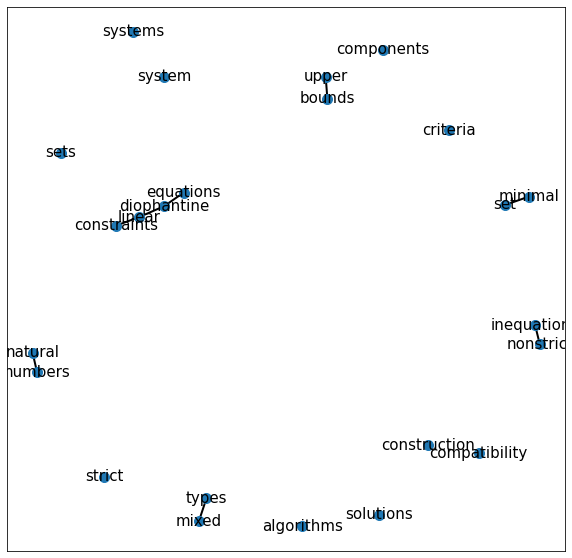

In [7]:
plt.figure(figsize=(10, 10))
G = extractor.graph
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=100)

# edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=2)

# labels
nx.draw_networkx_labels(G, pos, font_size=15, font_family="sans-serif");

## 実装理解

In [ ]:
"Compatibility of systems of linear constraints over the set of natural numbers."

In [16]:
w = nx.pagerank_scipy(extractor.graph, alpha=0.85, tol=0.0001, weight=None)
top_words = sorted(w, key=w.get, reverse=True)
top_words

['linear',
 'diophantine',
 'set',
 'natural',
 'numbers',
 'inequations',
 'nonstrict',
 'upper',
 'bounds',
 'minimal',
 'types',
 'mixed',
 'constraints',
 'equations',
 'compatibility',
 'systems',
 'criteria',
 'system',
 'strict',
 'components',
 'solutions',
 'algorithms',
 'construction',
 'sets']

In [21]:
w

{'compatibility': 0.009740551438814547,
 'systems': 0.009740551438814547,
 'linear': 0.08364814597488945,
 'constraints': 0.045293923398232655,
 'set': 0.06447103468656105,
 'natural': 0.06447103468656105,
 'numbers': 0.06447103468656105,
 'criteria': 0.009740551438814547,
 'system': 0.009740551438814547,
 'diophantine': 0.08364814597488945,
 'equations': 0.045293923398232655,
 'strict': 0.009740551438814547,
 'inequations': 0.06447103468656105,
 'nonstrict': 0.06447103468656105,
 'upper': 0.06447103468656105,
 'bounds': 0.06447103468656105,
 'components': 0.009740551438814547,
 'minimal': 0.06447103468656105,
 'solutions': 0.009740551438814547,
 'algorithms': 0.009740551438814547,
 'construction': 0.009740551438814547,
 'sets': 0.009740551438814547,
 'types': 0.06447103468656105,
 'mixed': 0.06447103468656105}

In [20]:
extractor.sentences[0].pos

['NOUN',
 'ADP',
 'NOUN',
 'ADP',
 'ADJ',
 'NOUN',
 'ADP',
 'DET',
 'NOUN',
 'ADP',
 'ADJ',
 'NOUN',
 'PUNCT']

In [14]:
key = lambda s: s.stems
key(extractor.sentences[0])

['compatibility',
 'of',
 'systems',
 'of',
 'linear',
 'constraints',
 'over',
 'the',
 'set',
 'of',
 'natural',
 'numbers',
 '.']

In [15]:
extractor.sentences[0].stems

['compatibility',
 'of',
 'systems',
 'of',
 'linear',
 'constraints',
 'over',
 'the',
 'set',
 'of',
 'natural',
 'numbers',
 '.']